In [1]:
from fastai.vision import *
import os
import glob
from tqdm import tqdm_notebook

print(torch.cuda.is_available())
print(os.getcwd())
torch.cuda.empty_cache()

True
/home/lh2910


In [2]:
labels = pd.read_csv('/home/lh2910/list_attr_celeba.csv')
labels.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [3]:
os.chdir('/home/lh2910/faces')
path = os.getcwd()
extracted_faces = glob.glob('*.jpg')
extracted_faces.sort()

A = set(extracted_faces)
slices = []
for i in labels.loc[:, 'image_id']:
    if i in A:
        slices.append(True)
    else:
        slices.append(False)

In [4]:
attractive = labels.loc[slices, ['image_id', 'Attractive', 'Male']]
attractive.head()

,image_id,Attractive,Male
0,000001.jpg,1,-1
1,000002.jpg,-1,-1
4,000005.jpg,1,-1
5,000006.jpg,1,-1
6,000007.jpg,1,1


In [5]:
attractive_male = attractive.loc[attractive.Male == 1, :]
attractive_male.head()

,image_id,Attractive,Male
6,000007.jpg,1,1
7,000008.jpg,-1,1
11,000012.jpg,1,1
12,000013.jpg,-1,1
14,000015.jpg,-1,1


In [6]:
tfms = get_transforms(do_flip=True, flip_vert=False,
                      p_affine=.75, p_lighting=.75,
                      max_lighting=.2, max_rotate=10, max_warp=.2, max_zoom=1.1)

data = (ImageList.from_df(attractive_male, path=path)
        .split_by_rand_pct(.2)
        .label_from_df(cols=1)
        .transform(tfms, size=224)
        .databunch()
        .normalize())

# Architecture

## ResNet 18

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-06


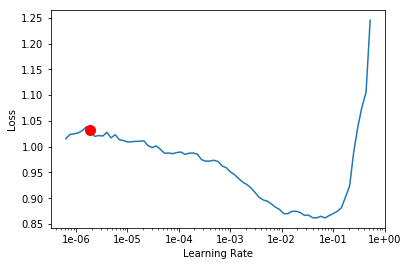

In [7]:
arch = models.resnet18
learn = cnn_learner(data, arch, metrics=[accuracy])
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [8]:
lr = 1e-2 # learn.recorder.min_grad_lr
learn.fit_one_cycle(1, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.475595,0.461361,0.772201,06:53


In [9]:
learn.model.eval()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [10]:
learn.save('/home/lh2910/models/exp/attractive_male_resnet18_t0')
learn.export('/home/lh2910/models/exp/attractive_male_resnet18_t0.pkl')
torch.cuda.empty_cache()

## ResNet34

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07


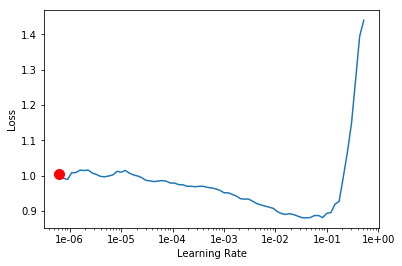

In [11]:
arch = models.resnet34
learn = cnn_learner(data, arch, metrics=[accuracy])
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [12]:
lr = 1e-2
learn.fit_one_cycle(1, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.458765,0.466578,0.764801,07:08


In [13]:
learn.model.eval()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [14]:
learn.save('/home/lh2910/models/exp/attractive_male_resnet34_t0')
learn.export('/home/lh2910/models/exp/attractive_male_resnet34_t0.pkl')
torch.cuda.empty_cache()

## ResNet50

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-06


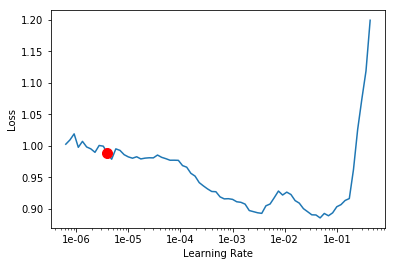

In [15]:
arch = models.resnet50
learn = cnn_learner(data, arch, metrics=[accuracy])
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [16]:
lr = 1e-2
learn.fit_one_cycle(1, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.450998,0.451568,0.776370,14:01


In [17]:
learn.model.eval()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

In [18]:
learn.save('/home/lh2910/models/exp/attractive_male_resnet50_t0')
learn.export('/home/lh2910/models/exp/attractive_male_resnet50_t0.pkl')
torch.cuda.empty_cache()

# Transformations

## Transform 1: No Warp

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.31E-06


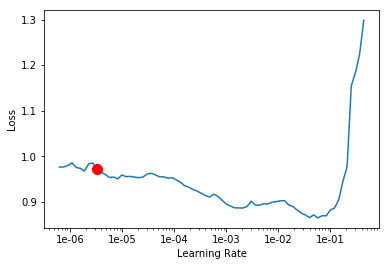

In [19]:
tfms = get_transforms(do_flip=True, flip_vert=False,
                      p_affine=.75, p_lighting=.75,
                      max_lighting=.2, max_rotate=10, max_warp=0, max_zoom=1.1)

data = (ImageList.from_df(attractive_male, path=path)
        .split_by_rand_pct(.2)
        .label_from_df(cols=1)
        .transform(tfms, size=224)
        .databunch()
        .normalize())

arch = models.resnet50
learn = cnn_learner(data, arch, metrics=[accuracy])
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [20]:
lr = 1e-2
learn.fit_one_cycle(1, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.446750,0.434521,0.790235,13:56


In [21]:
learn.save('/home/lh2910/models/exp/attractive_male_resnet50_t1')
learn.export('/home/lh2910/models/exp/attractive_male_resnet50_t1.pkl')
torch.cuda.empty_cache()

## Transform 2: No Zoom

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-05


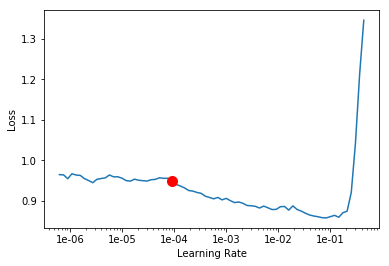

In [22]:
tfms = get_transforms(do_flip=True, flip_vert=False,
                      p_affine=.75, p_lighting=.75,
                      max_lighting=.2, max_rotate=10, max_warp=.2, max_zoom=1)

data = (ImageList.from_df(attractive_male, path=path)
        .split_by_rand_pct(.2)
        .label_from_df(cols=1)
        .transform(tfms, size=224)
        .databunch()
        .normalize())

arch = models.resnet50
learn = cnn_learner(data, arch, metrics=[accuracy])
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [23]:
lr = 1e-2
learn.fit_one_cycle(1, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.450781,0.432810,0.788448,13:55


In [24]:
learn.save('/home/lh2910/models/exp/attractive_male_resnet50_t2')
learn.export('/home/lh2910/models/exp/attractive_male_resnet50_t2.pkl')
torch.cuda.empty_cache()

## Transform 3: Max Lighting (+.2)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-04


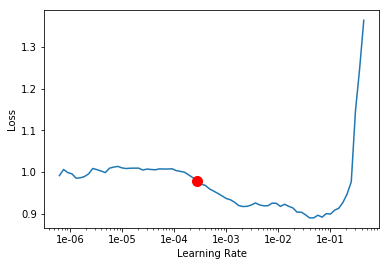

In [25]:
tfms = get_transforms(do_flip=True, flip_vert=False,
                      p_affine=.75, p_lighting=.75,
                      max_lighting=.4, max_rotate=10, max_warp=.2, max_zoom=1.1)

data = (ImageList.from_df(attractive_male, path=path)
        .split_by_rand_pct(.2)
        .label_from_df(cols=1)
        .transform(tfms, size=224)
        .databunch()
        .normalize())

arch = models.resnet50
learn = cnn_learner(data, arch, metrics=[accuracy])
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [26]:
lr = 1e-2
learn.fit_one_cycle(1, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.460398,0.431417,0.787938,13:56


In [27]:
learn.save('/home/lh2910/models/exp/attractive_male_resnet50_t3')
learn.export('/home/lh2910/models/exp/attractive_male_resnet50_t3.pkl')
torch.cuda.empty_cache()

## Transform 4: Max Rotate (+10)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06


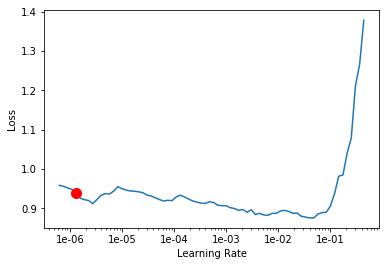

In [28]:
tfms = get_transforms(do_flip=True, flip_vert=False,
                      p_affine=.75, p_lighting=.75,
                      max_lighting=.2, max_rotate=20, max_warp=.2, max_zoom=1.1)

data = (ImageList.from_df(attractive_male, path=path)
        .split_by_rand_pct(.2)
        .label_from_df(cols=1)
        .transform(tfms, size=224)
        .databunch()
        .normalize())

arch = models.resnet50
learn = cnn_learner(data, arch, metrics=[accuracy])
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [29]:
lr = 1e-2
learn.fit_one_cycle(1, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.455150,0.436782,0.785301,13:55


In [30]:
learn.save('/home/lh2910/models/exp/attractive_male_resnet50_t4')
learn.export('/home/lh2910/models/exp/attractive_male_resnet50_t4.pkl')
torch.cuda.empty_cache()